<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week9/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 9
# Clustering

Now we come to unsupervised learning (i.e., unlabelled data). The objectives of clustering are:
* to organise the data into classes so that there is a high degree of intra-class similarity and a low degree of inter-class similarity
* to find the class labels and the number of classes
directly from the data (in contrast to
classification).
* to find natural groupings between objects.

There are two types of custering:
* Partitioning algorithms (for example, k-means)
* Hierarchical clustering

The aim of this laboratory session is to implement and compare them.

### Table of Contents
#### 1. Basic Examples
* 1.1 k-means in 1 dimension
* 1.2 Hierarchical clustering

#### 2. Runtime complexity comparison exercise

#### 3. Customers Segmentation
* 3.1 Load, prepare, and explore data
* 3.2 k-means algorithms
* 3.3 Hierarchical clustering

#### 4. Clustering vs. classification
* 4.1 Load data
* 4.2 Algorithms comparison: k-means vs. logistic regression


Author: Luc Kunz


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
import scipy.cluster.hierarchy as sch

# Customize plots
%matplotlib inline
plt.style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Basic Examples
As always, we first go through basic examples to better visualize and understand what happens.


### 1.1 k-means in 1 dimension

We first work with a simple data set of students grades.


In [ ]:
# Load data
grades = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week9/data/student_grades.csv")
print(len(grades))
grades.head()

36


,Course total (Real)
0,80.35
1,86.67
2,72.77
3,87.55
4,73.00


There are 36 grades that are between 0 and 100.

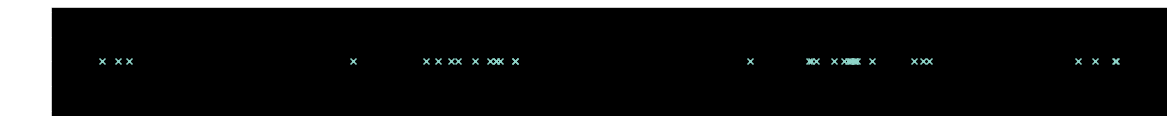

In [ ]:
# Plot the grades
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')

We clearly see 4 clusters:
* around 72.5 are the worst students
* around 80 are normal students
* around 87.5 are good students
* around 92.5 are excellent students

We now fit k-means algortims with different k (i.e. number of clusters).

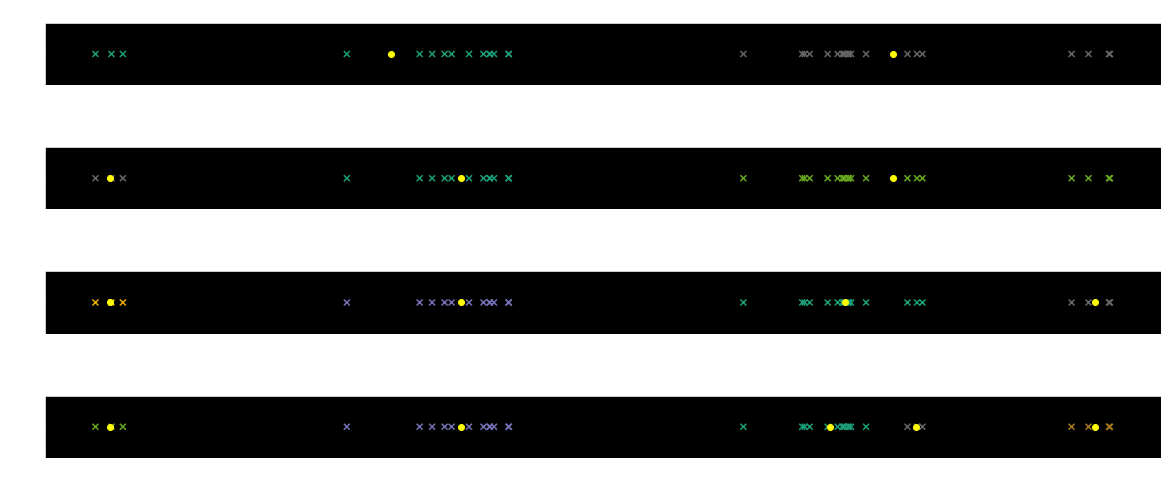

In [ ]:
# Fit k-means algorithm for different k
fig, ax = plt.subplots(4, 1, figsize=(20, 8))
for k in [2, 3, 4, 5]:
  # Create instance of class
  model = KMeans(n_clusters=k)
  # Fit model
  model.fit(grades)
  # Get centers of clusters
  centers = model.cluster_centers_
  # Get predictions
  pred = model.predict(grades)
  # Plot
  ax[k-2].scatter(grades, np.zeros_like(grades), marker='x', c=pred, cmap='Dark2')
  ax[k-2].scatter(centers, np.zeros_like(centers), color='yellow')
  ax[k-2].set_title('k-means algorithm with k = ' + str(k))
plt.subplots_adjust(hspace=1)

With 2 clusters, it already works well. We could then label students as `good` and `not so good` for example. However, it works best with 4 clusters. In order to find out the optimal number of groups, we can use the `elbow method` (i.e. plotting the objective/cost function for different k).

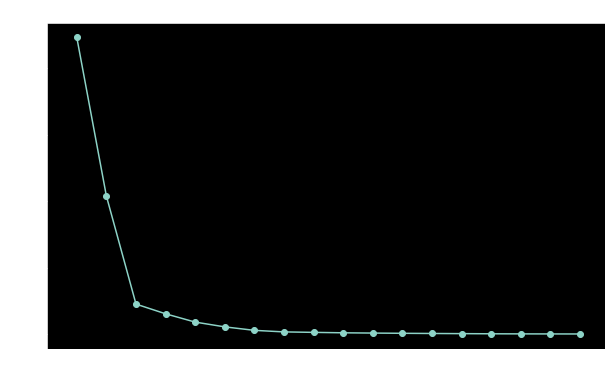

In [ ]:
# Elbow Method - inertia
inertia = []
k_values = range(2, 20)
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(grades)
  inertia.append(model.inertia_)

# Plot
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia, marker='o', linestyle='solid')
plt.title('Inertia for different k values')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
plt.show()


In this case, 4 is the optimal number of clusters. The `inertia` is defined as the sum of squared distances of samples to their closest cluster center. This is the cost function (i.e. what the algorithm tries to minimize).

### 1.2 Hierarchical clustering
In order to show how it works, we use a small set of 9 points.

In [ ]:
# Create Data
data = {
    "p":["p0", "p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"],
    "x1":[0.84, 0.15, 0.87, 0.90, 0.93, 0.88, 0.87, 0.12, 0.91],
    "x2":[0.91, 0.15, 0.47, 0.54, 0.84, 0.51, 0.86, 0.18, 0.73]}

data = pd.DataFrame(data)
data

,p,x1,x2
0,p0,0.84,0.91
1,p1,0.15,0.15
2,p2,0.87,0.47
3,p3,0.90,0.54
4,p4,0.93,0.84
5,p5,0.88,0.51
6,p6,0.87,0.86
7,p7,0.12,0.18
8,p8,0.91,0.73


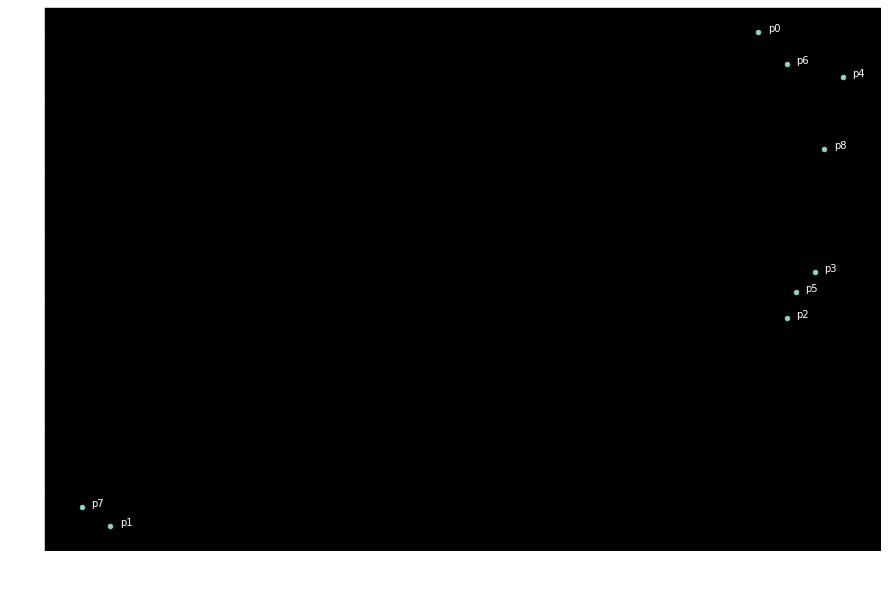

In [ ]:
# Plot
data.plot.scatter("x1", "x2", figsize=(15, 10))
for point in data.values:
  plt.text(point[1]+0.01, point[2], point[0])

In this case, there are 2 or 3 clusters. We can further compute the euclidean distances between the points.

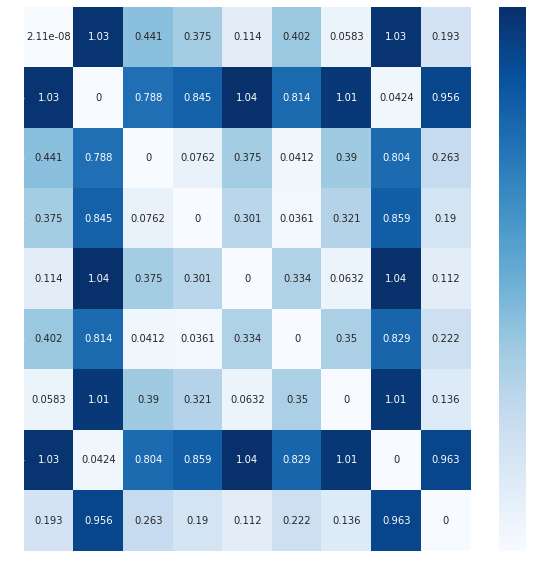

In [ ]:
# Show distances
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(pairwise_distances(data[["x1", "x2"]], metric='euclidean')), annot=True, cmap='Blues', fmt='.3g')

For example p0 is:
* close to p6, p4, p8
* a little further away from p3, p5, p2
* far from p1, p7

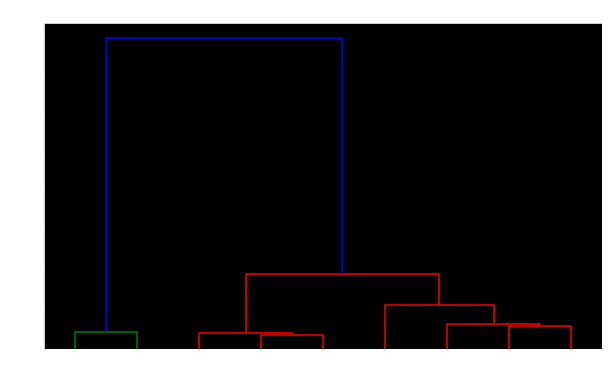

In [ ]:
# Plot dendrogram - linkage = 'single'
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data[["x1", "x2"]], method = 'single'))
plt.title('Dendrogram - single linkage')
plt.xlabel('p')
plt.ylabel('Euclidean distances')
plt.show()

With `single linkage`, we can see that p0 is first attached to p6, then the two to p4, and finally the three to p8. This is the first cluster. The resulting dendrogram depends on the linkage, as shown below. With 2 clusters we have: {p1, p7} and {p2, p3, p5, p8, p4, p0, p6} and with 3 clusters we have: {p1, p7}, {p2, p3, p5} and {p8, p4, p0, p6}.

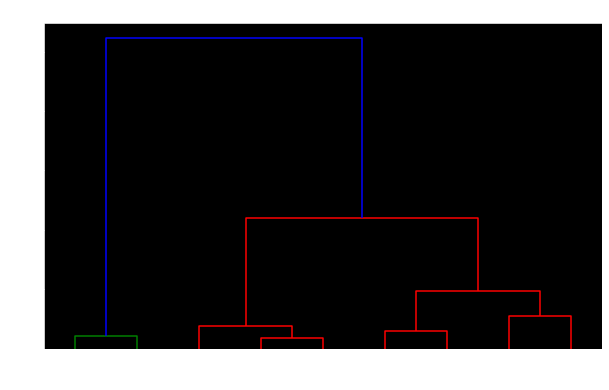

In [ ]:
# Plot dendrogram - linkage = 'complete'
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data[["x1", "x2"]], method = 'complete'))
plt.title('Dendrogram - complete linkage')
plt.xlabel('p')
plt.ylabel('Euclidean distances')
plt.show()

With `complete linkaage`, p0 is first attached to p6 and p4 to p8. Then the two groups are comnined to form a superset. This is because p4 and p8 are closer to each other than to the max distance to p0 or p6.

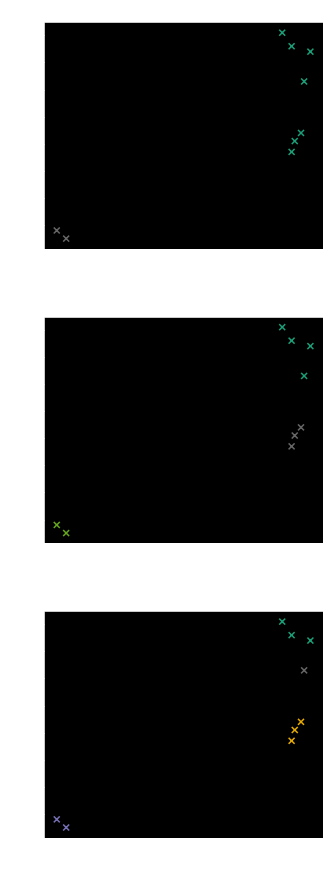

In [ ]:
# Plot with diiferent number of clusters
fig, ax = plt.subplots(3,1, figsize=(5,15))
for k in [2, 3, 4]:
  clustering = AgglomerativeClustering(n_clusters=k, linkage='single', affinity='euclidean')
  assignment = clustering.fit_predict(data[["x1", "x2"]])
  ax[k-2].scatter(data["x1"], data["x2"], marker='x', c=assignment, cmap='Dark2')
  ax[k-2].set_title('Hierarchical Clustering with k = ' + str(k))
  ax[k-2].set_xlabel("x1")
  ax[k-2].set_ylabel("x2")
plt.subplots_adjust(hspace=0.3)

We see that k = 2 and k = 3 is fine. However, k = 4 does not work in this case.

## 2. Runtime complexity comparison exercise

To do in groups: follow the steps and send your answers and code @Luc Kunz on Slack (direct message). This is a good way to improve your participation grade.

We want to compare the computation time needed between **Kmeans** and **Hierarchial clustering** for different numbers of points.



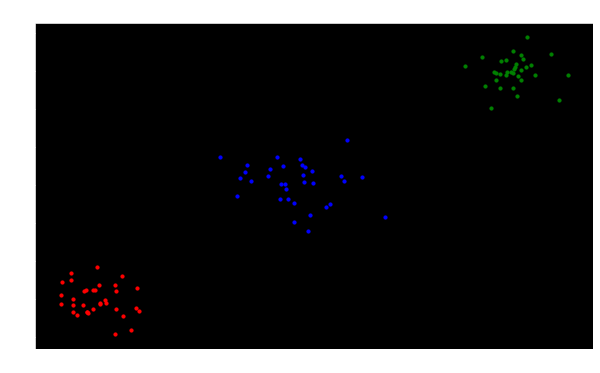

In [ ]:
# We create a function that generate 3 clusters
def generate_three_clusters(num_points):
  centers = [(-15, -15), (0, 0), (15, 15)]
  cluster_std = [2, 3, 2]
  X, y = make_blobs(n_samples=num_points, cluster_std=cluster_std, centers=centers, n_features=3, random_state=1)
  return X, y

# Example with 100 points
X, y = generate_three_clusters(100)
# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10)
plt.title('Number of points: 100')
plt.show()

### 2.1 Generate three cluster using the above function for n = 100, 1000, 2500, 5000, 7500, 10000, 25000 points. Store the returned X in a list `X_list`. You have to complete the code below where you see `[COMPLETE]`.




In [ ]:
# Define list
X_list = []
# Define numbers of points
num_points = [100, 1000, 2500, 5000, 7500, 10000, 25000]

for n in num_points:
  # Generate three clusters
  X, y = # [COMPLETE]

  # Append X to X_list
  # [COMPLETE]

SyntaxError: ignored

### 2.2 For all samples of points, fit a k-means algorithm and a hierarchical clustering algorithm and record to completion time. Use [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) with a number of cluster equal to 3. In order to record the time, use what method you want. Suggestion: you can use the `time` package as shown below.

In [ ]:
# Example with the time package
import time
start = time.time()
for i in range(10000000):
  a = 1 + 1 # do something
end = time.time()
print('Start: ' + str(start))
print('End: ' + str(end))
print('Time: ' + str(end-start))

In [ ]:
# Record time in list
k_means_time = []
hc_time = []

for X in X_list:

  # Create instance of KMeans class (with 3 clusters)
  model = # [COMPLETE]

  # Fit the model on X and record the time to fit
  # [COMPLETE]

  # Store the execution time in k_means_time
  k_means_time.append(.....)

  # Create instance of AgglomerativeClustering class (with 3 clusters)
  model = # [COMPLETE]

  # Fit the model on X and record the time to fit
  # [COMPLETE]

  # Store the execution time in hc_time
  hc_time.append(.....)

### 2.3 Plot the execution time vs. number of points for k-means and hierarchical clustering using an appropriate plot type.

In [ ]:
# [COMPLETE]

### 2.4 Send you code and a screenshot of your plot to @Luc Kunz on Slack to get the point.

## 3. Customer segmentation
We now implement customer segmentation with the two algorithms. The data set can be found [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

### 3.1 Load, prepare, and explore data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week9/data/Mall_Customers.csv', index_col=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


We have 200 customers with their gender, age, annual income, and spending score.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
# Convert Gender to numerical
df.Gender = df.Gender.astype('category').cat.codes
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

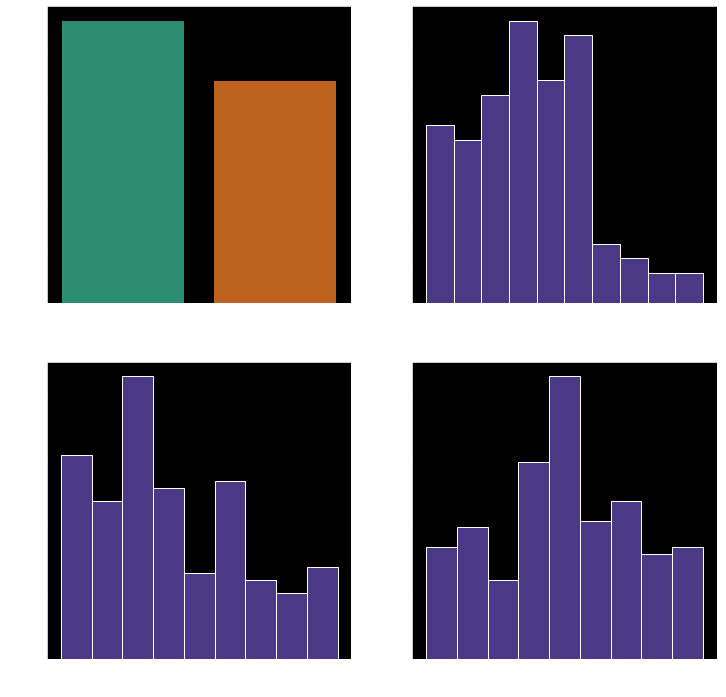

In [ ]:
# Univariate Analysis
fig, ax = plt.subplots(2, 2, figsize=(12,12))
i = 0
j = 0
for var in df:
  if var == "Gender":
    sns.countplot(x=df[var], ax=ax[i, j], palette='Dark2')
  else:
    sns.histplot(df[var], ax=ax[i, j], color=(0.4, 0.3, 0.7))
  i += 1
  if i == 2:
    i = 0
    j += 1
plt.show()

<Figure size 1080x1080 with 0 Axes>

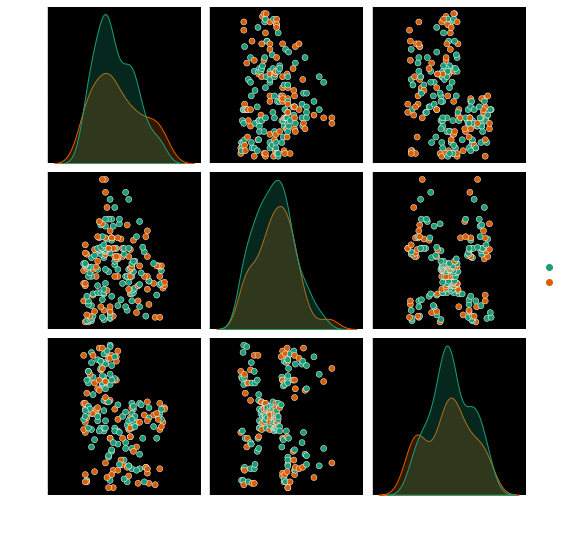

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='Gender', palette='Dark2')

Using `Annual Income` and `Spending Score`, we can observe 5 clusters.

### 3.2 k-means algorithms
Again, we first want to find out the good number of clusters.

In [ ]:
# Function to plot inertia
def k_means_inertia_plot(variables):

  # Create new dataframe
  new_df = df[variables]

  # Fit k-means algorithm for different k
  inertia = []
  k_values = range(2, 20)
  for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(new_df)
    inertia.append(model.inertia_)

  # Plot
  plt.figure(figsize=(10,6))
  plt.plot(k_values, inertia, marker='o', linestyle='solid')
  plt.title('Inertia for different k values')
  plt.ylabel('Inertia')
  plt.xlabel('k')
  plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
  plt.show()

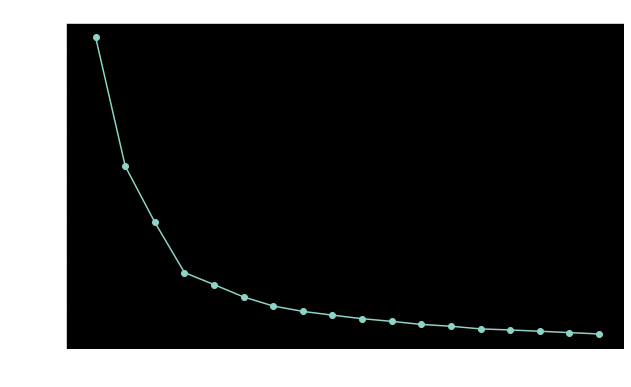

In [ ]:
# Use function - two variables
k_means_inertia_plot(["Annual Income (k$)", "Spending Score (1-100)"])

This confirms what we saw in the EDA. Using these two variables, 5 clusters are optimal.

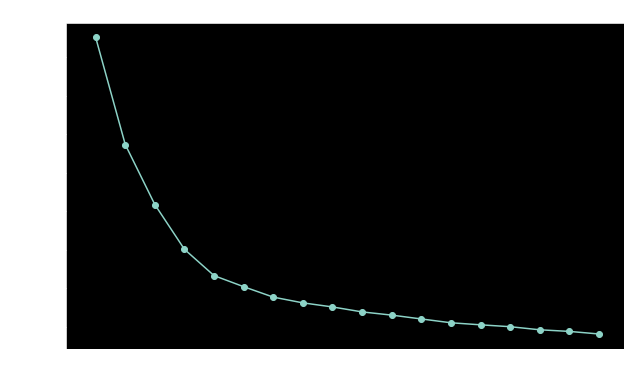

In [ ]:
# Use function - three variables
k_means_inertia_plot(["Annual Income (k$)", "Spending Score (1-100)", "Age"])

With three variables, this is less clear. Maybe 6 clusters would be great.

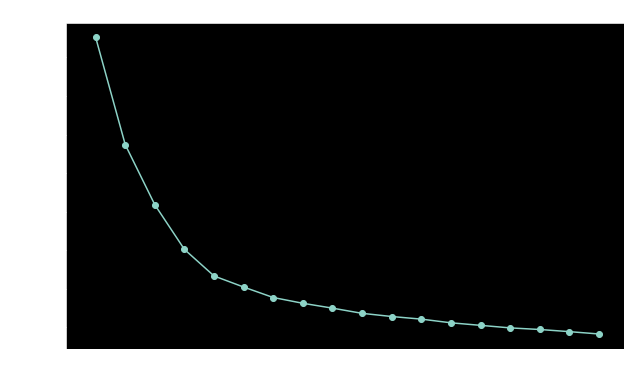

In [ ]:
# Use function - four variables
k_means_inertia_plot(["Annual Income (k$)", "Spending Score (1-100)", "Age", "Gender"])

Again, not clear with all four variables. Maybe 6 clusters would be good.

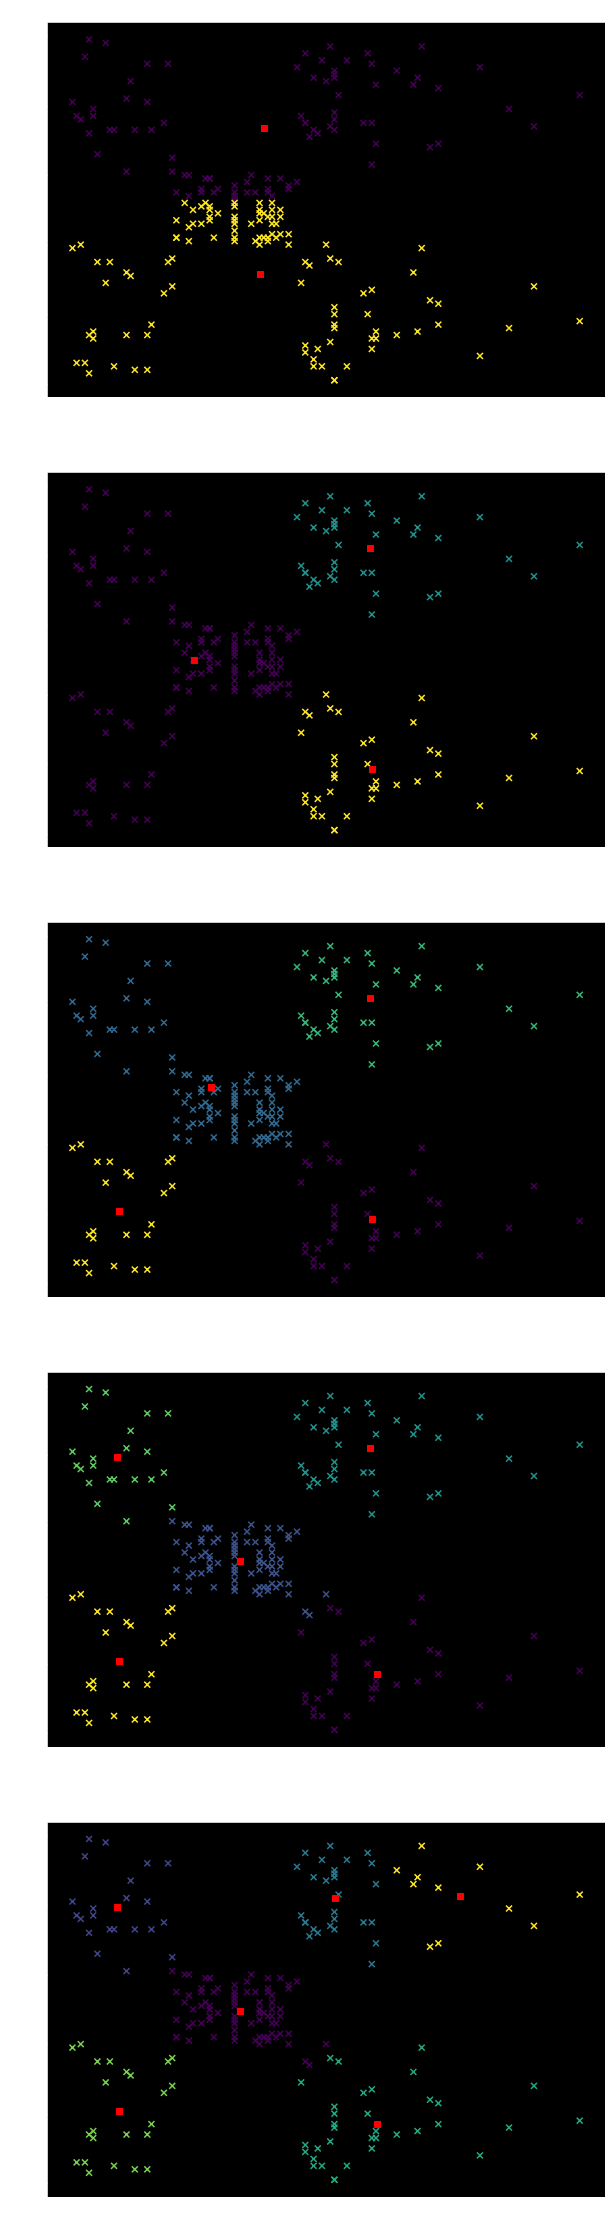

In [ ]:
# Plot clusters for k = 2,3,4,5,6 and two variables
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

fig, ax = plt.subplots(5,1, figsize=(10,40))
for k in [2, 3, 4, 5, 6]:
  model = KMeans(n_clusters=k)
  model.fit(new_df)
  centers = model.cluster_centers_
  pred = model.predict(new_df)
  ax[k-2].scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], marker='x', c=pred)
  for c in range(k):
    ax[k-2].scatter(centers[c][0], centers[c][1], color='red', marker=',')
  ax[k-2].set_title('k-means algorithm with k = ' + str(k))
  ax[k-2].set_xlabel("Annual Income (k$)")
  ax[k-2].set_ylabel("Spending Score (1-100)")

As already mentioned, the optimal number of cluster is 5 in this case. Once clustering is done, we may then use the result to label (i.e. classifiy) the customers, for example:
* Customers who earn little and spend little (the `reasonable poor`)
* Customer who earn little and spend a lot (the `senseless poor`)
* Customer who earn average and spend average (the `average people`)
* Customers who earn a lot and spend a lot (the `rich`). The marketing effort should focus mainly on them.
* Customer who earn a lot and spend little (the `stingy`).

With three variables and 6 clusters: [link](https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis)

### 3.3 Hierarchical clustering
We now do the same with hierarchical clustering. This yields similar results.

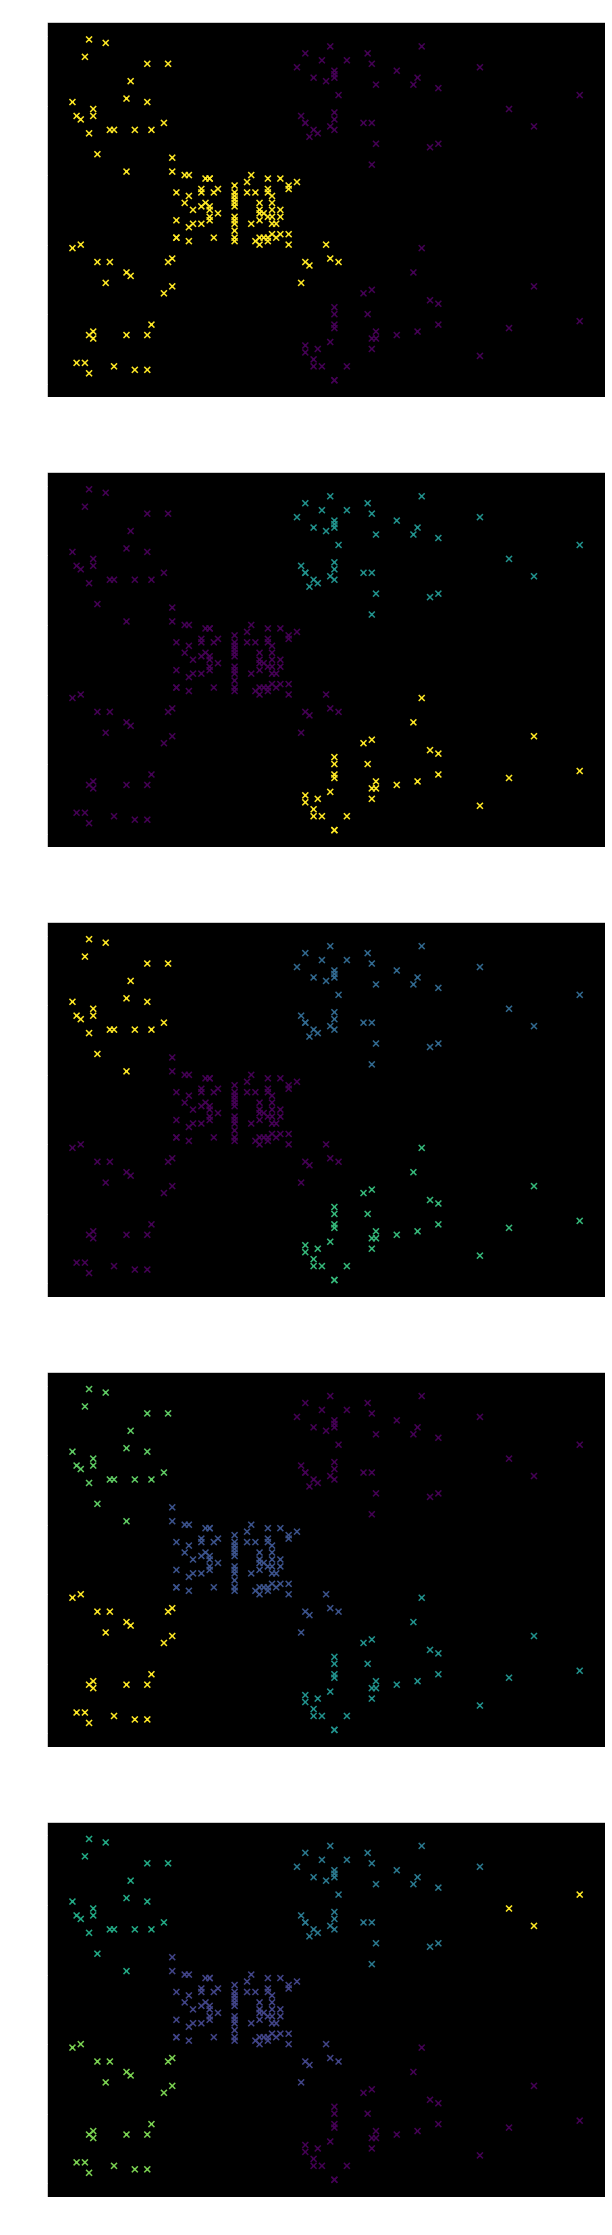

In [ ]:
# Plot with diiferent k and two variables
fig, ax = plt.subplots(5,1, figsize=(10,40))
for k in [2, 3, 4, 5, 6]:
  clustering = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean')
  assignment = clustering.fit_predict(new_df)
  ax[k-2].scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], marker='x', c=assignment)
  ax[k-2].set_title('Hierarchical Clustering with k = ' + str(k))
  ax[k-2].set_xlabel("Annual Income (k$)")
  ax[k-2].set_ylabel("Spending Score (1-100)")

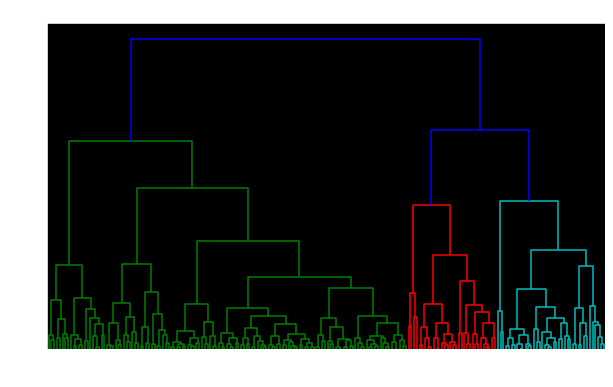

In [ ]:
# Plot dendrogram - complete
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(new_df, method = 'complete'))
plt.title('Dendrogram - complete linkage')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')
plt.show()

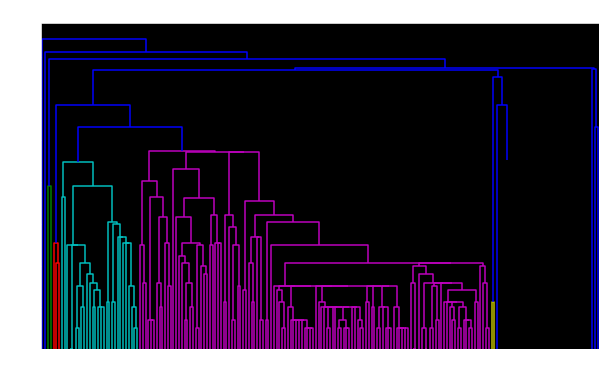

In [ ]:
# Plot dendrogram - single
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(new_df, method = 'single'))
plt.title('Dendrogram - single linkage')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')
plt.show()

It does not work with single linkage. With complete linkage, we can see the 5 clusters on the dendrogram.

## 4. Clustering vs. classification
We compare classification and clustering algortihms with labelled data. We use a data set of emails.

### 4.1 Load data

In [ ]:
emails = pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week9/data/spambase.csv')
emails.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
# Base rate
print(emails["class"].value_counts())
len(emails[emails["class"] == 0]) / len(emails)

0    2788
1    1813
Name: class, dtype: int64


0.6059552271245382

### 4.2 Algorithms comparison: k-means vs. logistic regression



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Select variables
X = emails.drop("class", axis = 1)
y = emails["class"]

# k-means
kmeans = KMeans(n_clusters=2)

# Logistic regression
logit = LogisticRegression()

algorithms = [kmeans, logit]

for algo in algorithms:

  # K-fold cross validation
  kf = KFold(n_splits=10, shuffle=True, random_state=42)

  # Conduct k-fold cross-validation
  cv_results = cross_val_score(algo, # Algorithm
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

  # Print mean
  print ("The Mean Score is", round(cv_results.mean(), 2))

The Mean Score is 0.64
The Mean Score is 0.92


Conclusion: classification is more precise for classification problems.

## References
* https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis
* https://www.kaggle.com/morecoding/hierarchical-clustering